# Лабораторная работа № 1. Линейная регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Обучите модель линейной регрессии оценивать  вес человека. Для начала постройте одномерную модель, где в качестве единственного признака будет только вес, который человек сообщил о себе сам. Для обучения линейной модели используейте класс из библиотеки scikit-learn - [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [5]:
from sklearn.linear_model import LinearRegression

## Задание

1. Обучите модель линейной регресси на данных, используя в качестве целевой переменной рост (height), а в качестве признака вес (weight).
2. Вычислите значение среднеквадратичной ошибки для построенной модели
3. Постройте прямую регресии и точки обучающей выборки
4. Расширьте пространство признаков, добавив туда пол и repwt.
5. Оцените как изменилась среднеквадратичная ошибка

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [40]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [41]:
y=ds.height; x=ds.weight
y=y.dropna(); x=x.dropna()

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.6)

C:\Users\pmuser\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [43]:
m=ds[ds.sex=="M"]
f=ds[ds.sex=="F"]

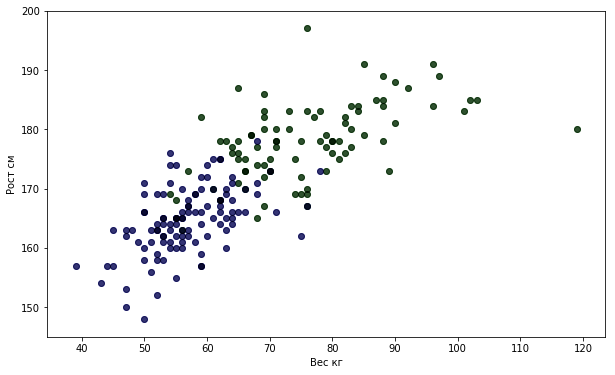

In [44]:
##Grafon
plt.figure(figsize=(10,6)) #размер
plt.scatter(m.weight,m.height,alpha=0.60, color='green') #Oy = height рост(см) Ox = weight вес(кг)
plt.scatter(f.weight,f.height,alpha=0.55, color='blue')
plt.scatter(x,y,alpha=0.54, color='k')
plt.ylabel('Рост см')
plt.xlabel('Вес кг')

In [45]:
## Im model
Legr=LinearRegression()

In [47]:
x_rg=pd.DataFrame(X_train)
y_rg=pd.DataFrame(Y_train)

In [48]:
Legr.fit(x_rg,y_rg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
#наклон
Legr.coef_

array([[ 0.4950186]])

In [50]:
Legr.intercept_

array([ 138.71645421])

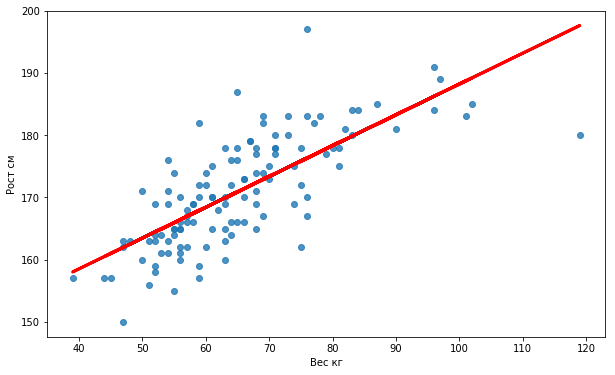

In [56]:
##Grafon
plt.figure(figsize=(10,6)) #размер
plt.scatter(X_train,Y_train,alpha=0.80) #Oy = height рост(см) Ox = weight вес(кг)

plt.plot(x_rg,Legr.predict(x_rg), color='red',linewidth=3)

plt.ylabel('Рост см')
plt.xlabel('Вес кг')

In [57]:
# Точность модели (R^2)
Legr.score(x_rg,y_rg)

0.54722104759047197

In [71]:
Legr.predict([[76]])

array([[ 176.3378675]])

In [72]:
xh=array(X_test); yh=array(Y_test)

In [73]:
nx=len(xh)
for i in range(0,nx):
    print(xh[i],"= ",Legr.predict([[xh[i]]]));

76 =  [[ 176.3378675]]
70 =  [[ 173.36775593]]
56 =  [[ 166.43749558]]
76 =  [[ 176.3378675]]
64 =  [[ 170.39764435]]
50 =  [[ 163.46738401]]
62 =  [[ 169.40760716]]
59 =  [[ 167.92255137]]
78 =  [[ 177.32790469]]
78 =  [[ 177.32790469]]
57 =  [[ 166.93251418]]
80 =  [[ 178.31794189]]
54 =  [[ 165.44745839]]
50 =  [[ 163.46738401]]
55 =  [[ 165.94247699]]
52 =  [[ 164.4574212]]
85 =  [[ 180.79303487]]
89 =  [[ 182.77310925]]
53 =  [[ 164.9524398]]
66 =  [[ 171.38768154]]
88 =  [[ 182.27809065]]
79 =  [[ 177.82292329]]
53 =  [[ 164.9524398]]
54 =  [[ 165.44745839]]
59 =  [[ 167.92255137]]
65 =  [[ 170.89266295]]
64 =  [[ 170.39764435]]
82 =  [[ 179.30797908]]
55 =  [[ 165.94247699]]
43 =  [[ 160.00225384]]
88 =  [[ 182.27809065]]
55 =  [[ 165.94247699]]
57 =  [[ 166.93251418]]
50 =  [[ 163.46738401]]
50 =  [[ 163.46738401]]
45 =  [[ 160.99229103]]
49 =  [[ 162.97236541]]
53 =  [[ 164.9524398]]
59 =  [[ 167.92255137]]
64 =  [[ 170.39764435]]
47 =  [[ 161.98232822]]
50 =  [[ 163.46738401]

In [74]:
X_train

90      57
35      68
58      73
179     81
27      63
167     63
100     55
80      69
101     55
168     66
19      76
21     119
196     74
92      56
177     60
24      66
159     58
151     57
120     65
132     87
79      69
29      39
69      52
37      56
16      65
20      61
28      58
106     53
118     96
187     60
      ... 
93      84
9       71
52      56
155     48
61      68
44      78
180     68
22      61
76      50
15      52
153     47
156     54
50      75
18      62
81      61
158     59
73      55
188     58
162     54
34      52
99      52
72      66
176     71
3       53
59      75
30     101
78      63
128     45
25      54
102     63
Name: weight, Length: 120, dtype: int64

In [75]:
X_test

7       76
91      70
165     56
171     76
145     64
134     50
71      62
193     59
64      78
121     78
160     57
181     80
46      54
75      50
146     55
142     52
140     85
192     89
83      53
141     66
39      88
33      79
136     53
49      54
110     59
23      65
14      64
174     82
82      55
182     43
      ... 
143     53
111     84
116     62
195     62
139     90
74      56
185     70
178     66
87      62
17      92
105     62
170     53
51      82
191     88
107     52
175     62
97     103
45      85
31      71
112     79
135     83
138     62
2       58
70      80
10      65
154     55
94      69
41      54
157     69
131     62
Name: weight, Length: 80, dtype: int64